In [1]:
import numpy as np
import pandas as pd
import vaderSentiment
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
ba_reviews_experts_en = pd.read_parquet('../generated/ba_reviews_experts_en.parquet')[['user_id', 'text']]

In [3]:
ba_text = " ".join(review for review in ba_reviews_experts_en.text)
output_file = "../generated/corpus/ba_reviews_experts.txt"
with open(output_file, "w", encoding="utf-8") as file:
    file.write(ba_text)
print(f"Le fichier a été sauvegardé sous le nom '{output_file}'.")

Le fichier a été sauvegardé sous le nom '../generated/corpus/ba_reviews_experts.txt'.


In [4]:
analyzer = SentimentIntensityAnalyzer()

In [5]:
sentences = sent_tokenize(ba_text)

Text(0, 0.5, 'Number of sentences')

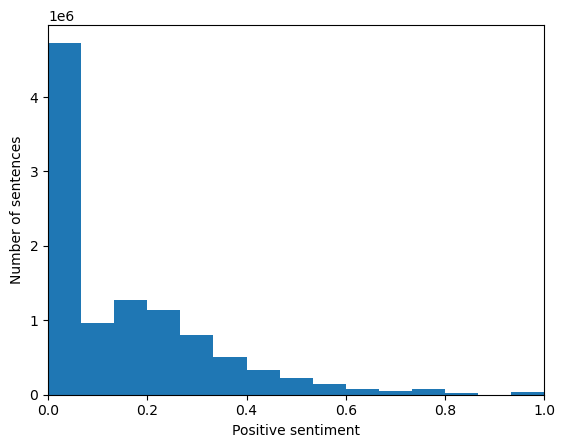

In [6]:
positive_sent = [analyzer.polarity_scores(sent)['pos'] for sent in sentences]
plt.hist(positive_sent,bins=15)
plt.xlim([0,1])
plt.xlabel('Positive sentiment')
plt.ylabel('Number of sentences')

Text(0, 0.5, 'Number of sentences')

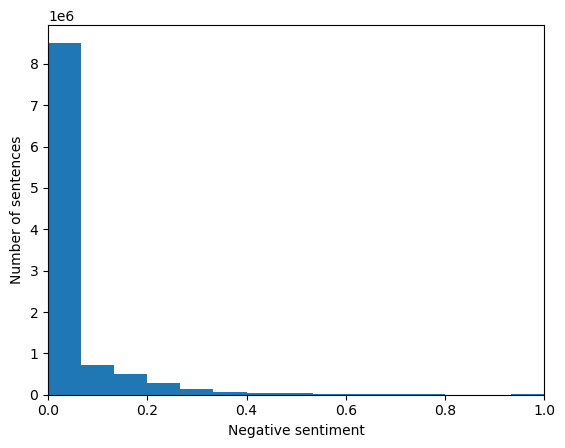

In [7]:
negative_sent = [analyzer.polarity_scores(sent)['neg'] for sent in sentences]
plt.hist(negative_sent,bins=15)
plt.xlim([0,1])
plt.xlabel('Negative sentiment')
plt.ylabel('Number of sentences')

Text(0, 0.5, 'Number of sentences')

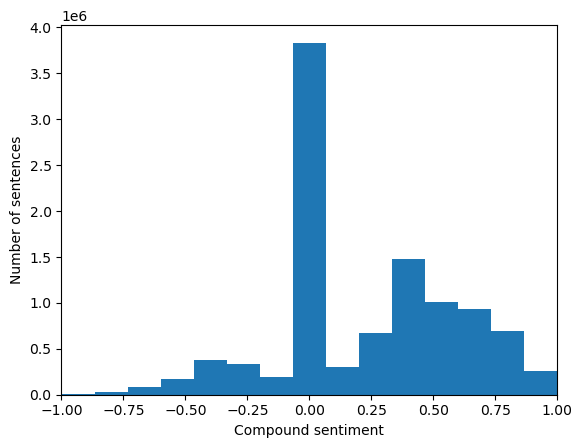

In [8]:
total_sent = [analyzer.polarity_scores(sent)['compound'] for sent in sentences]
plt.hist(total_sent,bins = 15)
plt.xlim([-1,1])
plt.xlabel('Compound sentiment')
plt.ylabel('Number of sentences')

In [9]:
sents = [analyzer.polarity_scores(sent.text)['compound'] for sent in doc.sents]
print('Number of positive sentences:',sum(np.array(sents)>=0.05))
print('Number of negative sentences:',sum(np.array(sents)<=-0.05))
print('Number of neutral sentences:',sum(np.abs(np.array(sents))<0.05))

NameError: name 'doc' is not defined